<a href="https://colab.research.google.com/github/Santanukolkata/Data_Science/blob/master/Time_Series/Lagplots_using_AirPassangers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Time series modeling assumes a relationship between an observation and the previous observation.

Previous observations in a time series are called lags,

with the observation at the previous time step called lag1
the observation at 2 time steps ago lag2
A Lag plot is a scatter plot of a time series against a lag of itself.

It plots the observation at time t on the x-axis and the lag1 observation (t-1) on the y-axis.

if the points cluster along a diagonal line from the bottom-left to the top-right of the plot, it suggests a positive correlation relationship.

If the points cluster along a diagonal line from the top-left to the bottom-right, it suggests a negative correlation relationship.

Either relationship is good as they can be modeled.
More points tighter in to the diagonal line suggests a stronger relationship and more spread from the line suggests a weaker relationship.

A ball in the middle or a spread across the plot suggests a weak or no relationship.

It is normally used to check for autocorrelation

If there is any pattern existing in the series , the series is autocorrelated

If there is no such pattern, the series is likely to be random white noise (is it usefule for TS analysis?)

In below example on Sunspots area time series, the plots get more and more scattered as the n_lag increases.

Pandas has a built-in function for exactly this called the lag plot. It plots the observation at time t on the x-axis and the lag1 observation (t-1) on the y-axis.

Essentially, Lag plots are used to check if a data set or time series is random.

Random data should not exhibit any structure in the lag plot.

The lag argument may be passed,

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8008dec588>,
      dtype=object)

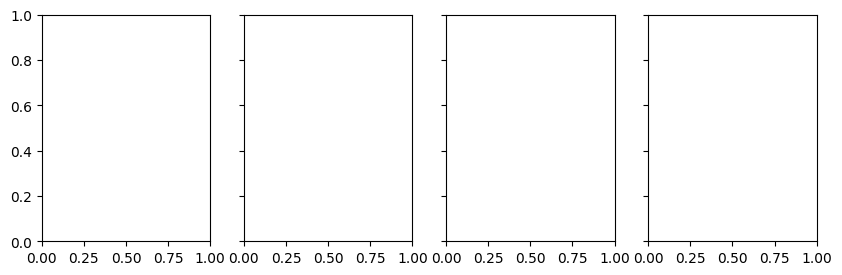

In [5]:
fig, axes = plt.subplots(1, 4, 
                         figsize=(10,3), 
                         sharex=True, 
                         sharey=True, 
                         dpi=100)
axes

In [6]:
df =pd.read_csv('https://raw.githubusercontent.com/Santanukolkata/Data_Science/master/Time_Series/AirPassengers.csv')

In [7]:
df.columns

Index(['Month', '#Passengers'], dtype='object')

In [8]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


Text(0.5, 1.15, 'Lag Plots of Air Passanger Data')

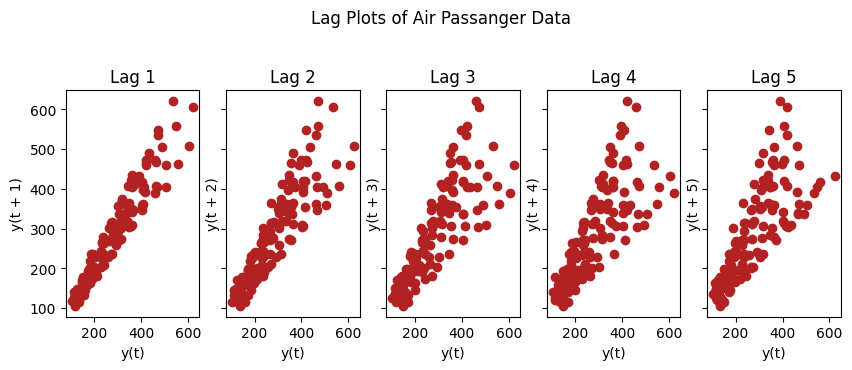

In [13]:
# Plot
fig, axes = plt.subplots(1, 5, 
                         figsize=(10,3), 
                         sharex=True, 
                         sharey=True, 
                         dpi=100)

for i, ax in enumerate(axes.flatten()[:5]):
    
    lag_plot(df['#Passengers'], 
             lag=i+1, 
             ax=ax, 
             c='firebrick')
    
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Air Passanger Data', y=1.15)    


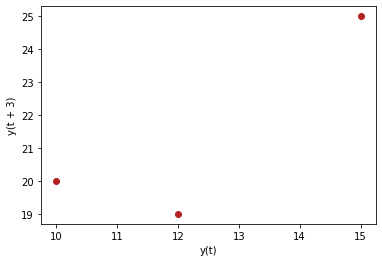

In [21]:
    lag_plot(df_1['cols'], 
             lag=i-1, 
             c='firebrick')

In [44]:
dict={'cols':[10,15,20,25,30,35]}
df_1 =pd.DataFrame(dict)
df_1

,cols
0,10
1,15
2,20
3,25
4,30
5,35


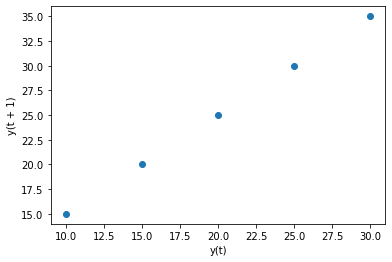

In [45]:
lag_plot(df_1['cols'], lag=1);

In [46]:
df_1['lagged']=df_1['cols'].shift(1)
df_1

,cols,lagged
0,10,NaN
1,15,10.0
2,20,15.0
3,25,20.0
4,30,25.0
5,35,30.0


In [42]:
df_1.dropna(inplace=True)

Text(0, 0.5, 'Y(t+1)')

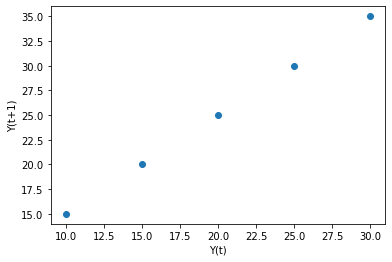

In [50]:
plt.scatter(df_1['lagged'],df_1['cols'])
plt.xlabel('Y(t)')
plt.ylabel('Y(t+1)')